# EDA: Data Visulisation and Analysis

---
Exploratory data analysis/visualization to gather relevant insights

### Essential Libraries

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import pickle
sb.set() # set the default Seaborn style for graphics

In [2]:
df = pd.read_pickle('../dataset/data_prepare1.pickle')
df.head()

,rating,reviews,happiness,ceo_approval,ceo_count,roles,salary,employees,industry,revenue,Work/Life Balance,Compensation/Benefits,Job Security/Advancement,Management,Culture,avg_salary
1,3.4,437,NaN,57,199,"{'Workday HCM Consultant': '5.0', 'Software Te...",{'Customer Service Representative': '$29.97 pe...,8,Commodities,7,3.4,3.5,2.8,2.9,3.2,83730.200000
2,3.5,367,NaN,78,167,"{'Claims Examiner': '4.7', 'Office Assistant':...","{'Insurance Agent': '$48,284 per year', 'Agent...",7,Financials,7,3.7,3.3,3.2,3.1,3.3,40685.666667
3,4.2,803,"{'Work Happiness Score': '76', 'Appreciation':...",83,275,"{'Mentor': '5.0', 'Intern': '5.0', 'Security C...","{'Graduate Researcher': '$26,598 per year', 'R...",8,Govt_Services,7,4.0,3.7,3.6,3.7,4.0,36279.933333
4,4.1,501,"{'Work Happiness Score': '70', 'Learning': '81...",89,181,NaN,"{'Program Coordinator': '$48,016 per year', 'R...",8,Govt_Services,7,4.1,3.8,3.7,3.7,3.9,45855.000000
5,4.0,183,NaN,76,84,"{'Laboratory Assistant': '5.0', 'Senior Resear...",NaN,8,Commodities,9,4.0,3.7,3.4,3.6,3.9,NaN


In [3]:
df2 = pd.read_pickle('../dataset/data_prepare2.pickle')
df2.head()

,rating,reviews,ceo_approval,ceo_count,roles,salary,employees,industry,revenue,Work/Life Balance,Compensation/Benefits,Job Security/Advancement,Management,Culture,avg_salary,Work Happiness Score
1,4.2,803,83,275,"{'Mentor': '5.0', 'Intern': '5.0', 'Security C...","{'Graduate Researcher': '$26,598 per year', 'R...",8,Govt_Services,7,4.0,3.7,3.6,3.7,4.0,36279.933333,76
2,4.1,501,89,181,NaN,"{'Program Coordinator': '$48,016 per year', 'R...",8,Govt_Services,7,4.1,3.8,3.7,3.7,3.9,45855.000000,70
3,3.9,167,90,79,"{'Director of Human Resources': '5.0', 'Food R...","{'Housekeeper': '$12.57 per hour', 'Attendant'...",8,Leisure,5,3.6,3.7,3.5,3.4,3.8,25590.933333,71
4,2.7,541,41,233,"{'Technician': '3.8', 'Personal Technology Exp...","{'Service Technician': '$10.49 per hour', 'Des...",7,Tech,4,2.8,2.5,2.2,2.5,2.6,22207.466667,45
5,3.2,271,58,117,"{'Bookkeeper': '4.3', 'Delivery Specialist': '...","{'Yard Worker': '$8.14 per hour', 'Yard Specia...",7,Real_Estate,7,3.2,3.0,2.6,2.8,3.0,23400.000000,60


## Statistical Summary for Predictor: Rating

In [4]:
rating = pd.DataFrame(df['rating'])
print("Data type : ", type(rating))
print("Data dims : ", rating.size)
rating.describe()


Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  6476


,rating
count,6476.000000
mean,3.533879
std,0.423635
min,1.700000
25%,3.300000
50%,3.500000
75%,3.800000
max,5.000000


<AxesSubplot:>

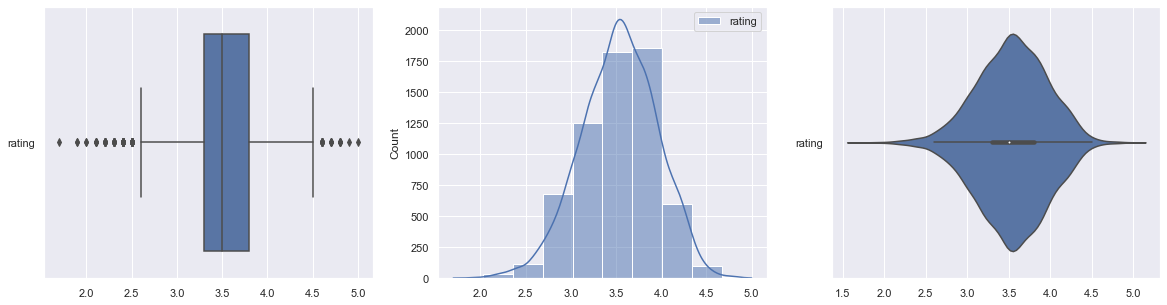

In [5]:
fig, axs = plt.subplots(1,3,figsize=(20,5))
sb.boxplot(data = rating, ax=axs[0], orient = "h")
sb.histplot(rating, ax=axs[1], bins=10, kde=True)
sb.violinplot(data = rating, ax=axs[2], orient = "h")

## Statistical Summary for Predictor: Happiness Score

In [6]:
happiness_score = pd.DataFrame(df2['Work Happiness Score'])
print("Data type : ", type(rating))
print("Data dims : ", rating.size)
happiness_score.describe()


Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  6476


,Work Happiness Score
count,3117.000000
mean,62.287135
std,9.023753
min,31.000000
25%,56.000000
50%,62.000000
75%,68.000000
max,94.000000


<AxesSubplot:>

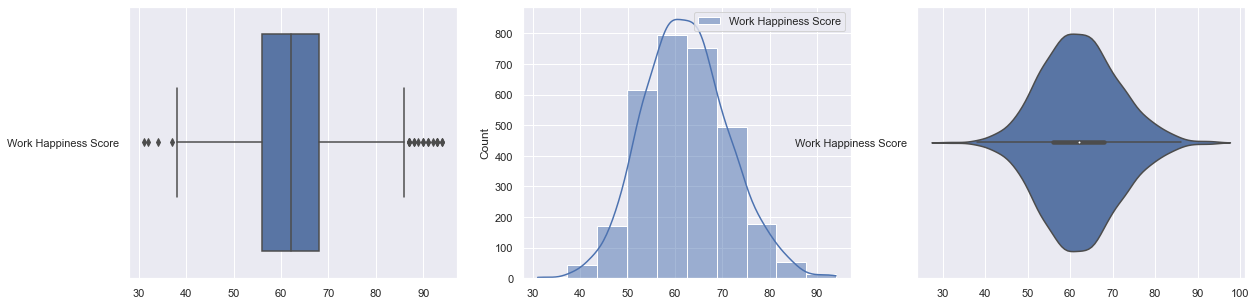

In [7]:
fig, axs = plt.subplots(1,3,figsize=(20,5))
sb.boxplot(data = happiness_score, ax=axs[0], orient = "h")
sb.histplot(happiness_score, ax=axs[1], bins=10, kde=True)
sb.violinplot(data = happiness_score, ax=axs[2], orient = "h")

---
## 1. Exploring Features (Numeric)
---
> Detailed Ratings of Company <br>
> Happiness-Related Ratings <br>
> `choose yourself` <br>

### 1.1 Detailed Ratings of Company
- Work/Life Balance
- Compensation/Benefits
- Job Security/Advancement
- Management
- Culture


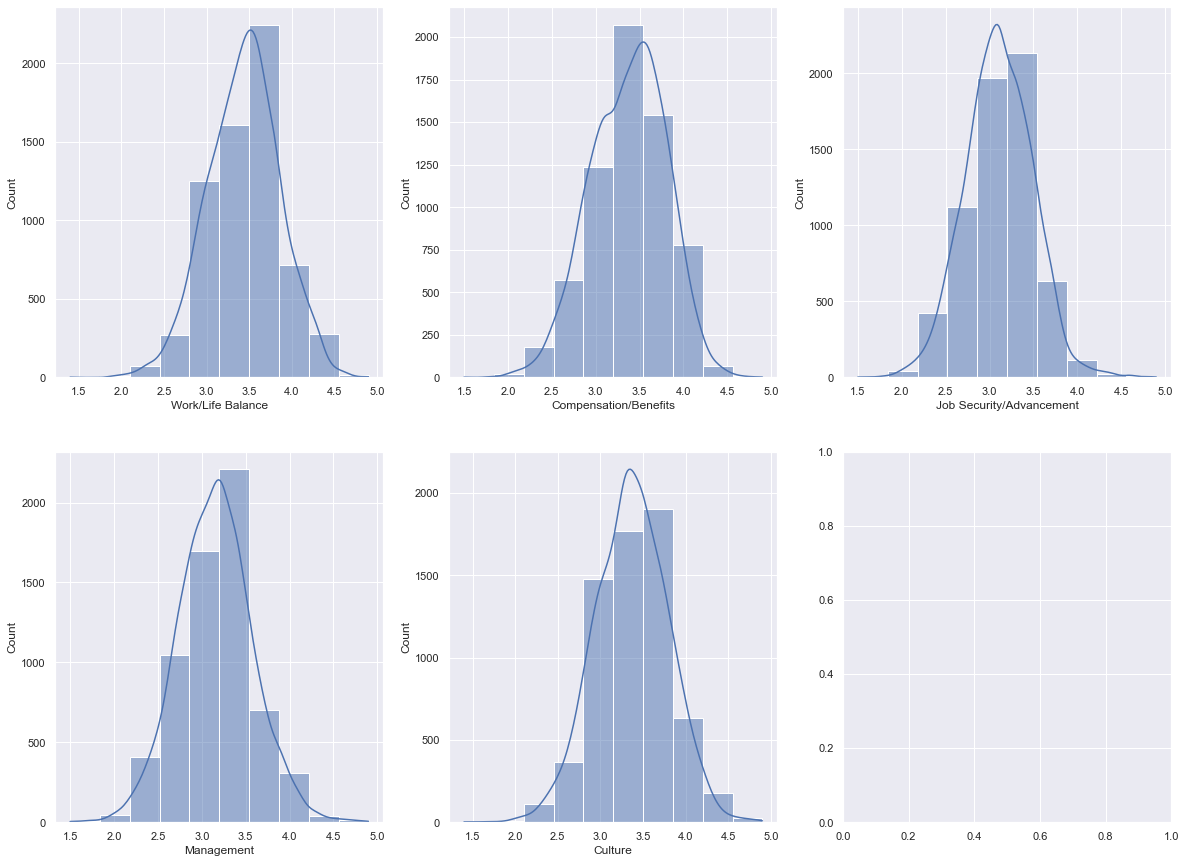

In [8]:
fig, axs = plt.subplots(2, 3, figsize=(20,15))
col_index = 0
for i, col in enumerate(['Work/Life Balance', 'Compensation/Benefits', 'Job Security/Advancement', 'Management', 'Culture']):
    row_index = int(i / 3)
    col_index = int(i - (row_index * 3) )
    sb.histplot(df[col], bins=10, ax=axs[row_index,col_index], kde=True)
    #col_index = 0 if col_index else 1


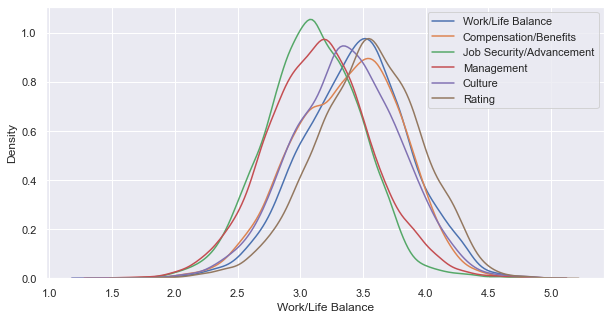

In [9]:
fig, axs = plt.subplots(figsize=(10,5))
for i, col in enumerate(['Work/Life Balance', 'Compensation/Benefits', 'Job Security/Advancement', 'Management', 'Culture']):
    sb.kdeplot(df[col], label=col)
    
sb.kdeplot(df['rating'], label='Rating')
plt.legend()

### Discoveries:
As expected, the company-related ratings (worklife balance, compensation, advancement, management, culture) have similar distribution as rating (predictor), leading to the further exploration on their correlations.

<AxesSubplot:>

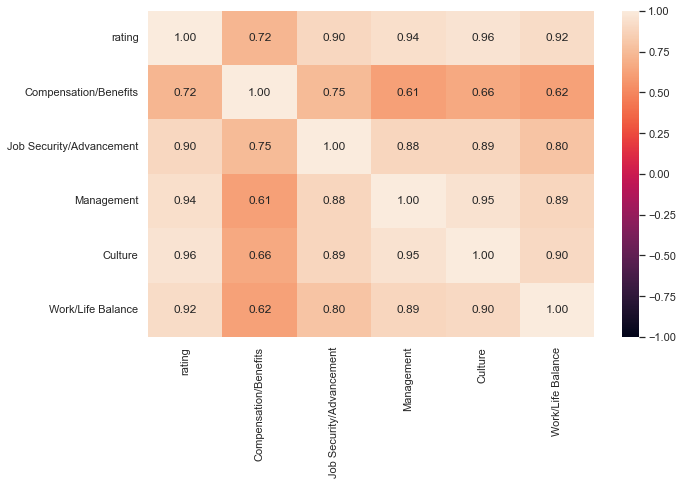

In [10]:
fig, axs = plt.subplots(figsize=(10,6))
jointDF_rating = pd.concat([df['rating'],
                               df['Compensation/Benefits'],
                               df['Job Security/Advancement'],
                               df['Management'],
                               df['Culture'],
                               df['Work/Life Balance'],], axis = 1).reindex()
sb.heatmap(jointDF_rating.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

### Discoveries:
1. Surprisingly, all perspectives have strong positive correlation (>=0.9) with company ratings except the compensation/benefit (0.72). 
2. However, the features (attributes) have strong positive relationships among themselves
    - Culture & Work/Life Balance (0.9)
    - Culture & Management (0.95)
    - Culture & Job Security (0.89)
    - Job Security & Management (0.88)
   Leading to the thoughts: these variables may not be independent from each other <br>
   Hence, in the prediction, we have to filtered out those "more important" features

---

### 1.2. Happiness-Related Ratings
Work Happiness Score is the weighted average of the following attributes
- Appreciation
- Purpose
- Learning
- Support
- Achievement
- Flexibility
- Trust
- Energy
- Inclusion
- Belonging
- Management
- Compensation

We will explore work happiness score with other attributes
- avg_salary
- ceo_approval
- Work/Life Balance
- Compensation/Benefits
- Job Security/Advancement
- Management
- Culture

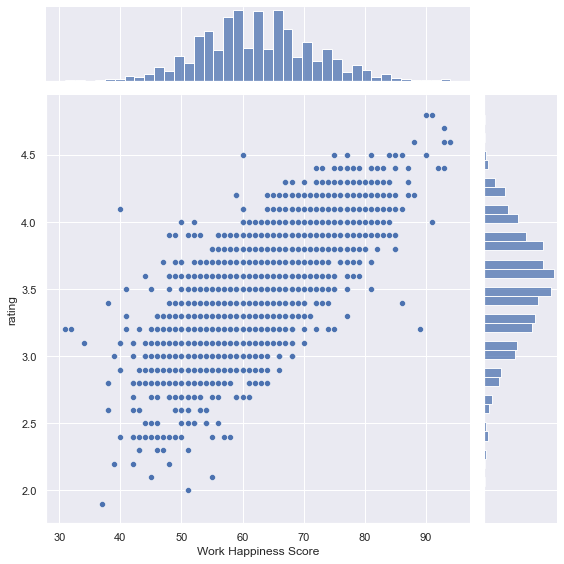

In [11]:
sb.jointplot(data = df2, x='Work Happiness Score', y='rating', height = 8)

In [12]:
# Calculate the correlation between the two columns/variables
pd.concat([df2['Work Happiness Score'],df2['rating']], axis = 1).reindex().corr()

,Work Happiness Score,rating
Work Happiness Score,1.000000,0.758429
rating,0.758429,1.000000


<AxesSubplot:>

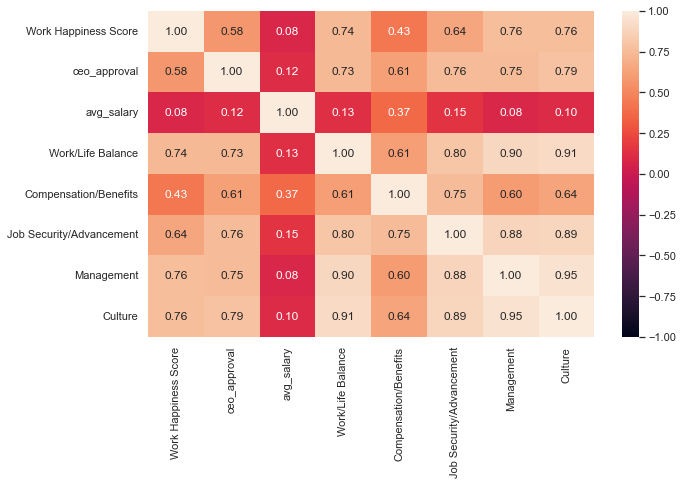

In [13]:
jointDF_rating2 = pd.concat([df2['Work Happiness Score'],
                             df2['ceo_approval'],
                            df2['avg_salary'],
                            df2['Work/Life Balance'],
                            df2['Compensation/Benefits'],
                            df2['Job Security/Advancement'],
                            df2['Management'],
                            df2['Culture']
                           ], axis = 1).reindex()

fig, axs = plt.subplots(figsize=(10,6))
sb.heatmap(jointDF_rating2.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

### Discoveries:
1. The **working happiness score** has strong positive correlation with company **rating**, corr = `0.758429`
2. The **working happiness score** are found to have strong positive correlation with some attributes: 
    - Management
    - Culture
    - Work/Life Balance
    
Similar to company rating, the happiness score does not have obvious relationship with `compensation`, and no correlation with `salary` at all.

---

### 1.3. CEO (approvals) 
This attribute indicates the supporting rate of the CEO in the company 


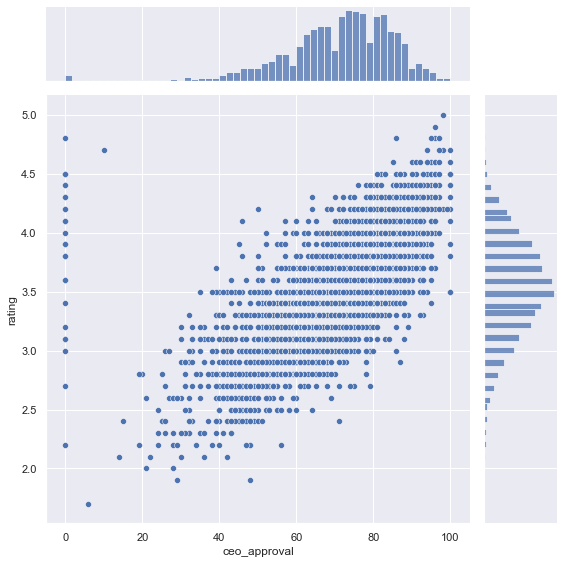

In [14]:
sb.jointplot(data = df, x='ceo_approval', y='rating', height = 8)

In [15]:
pd.concat([df['ceo_approval'],df['rating']], axis = 1).reindex().corr()

,ceo_approval,rating
ceo_approval,1.000000,0.717717
rating,0.717717,1.000000


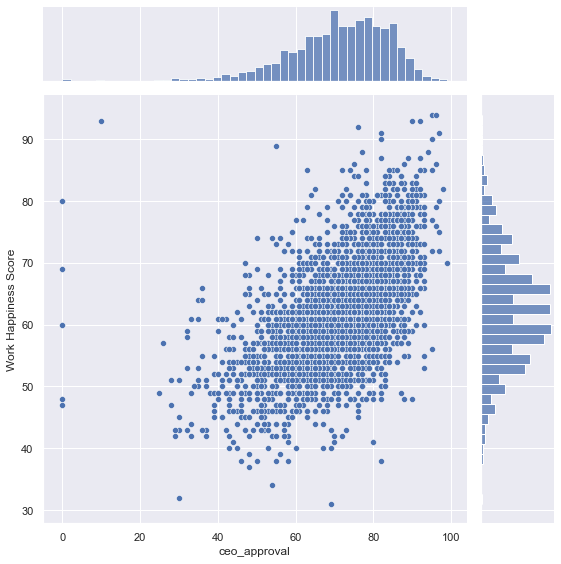

In [17]:
sb.jointplot(data = df2, x='ceo_approval', y='Work Happiness Score', height = 8)

In [18]:
pd.concat([df2['ceo_approval'],df2['Work Happiness Score']], axis = 1).reindex().corr()

,ceo_approval,Work Happiness Score
ceo_approval,1.000000,0.576808
Work Happiness Score,0.576808,1.000000


### Discoveries:

## 1.4. Salaries
The average salaries of employees among different roles regardless of industries

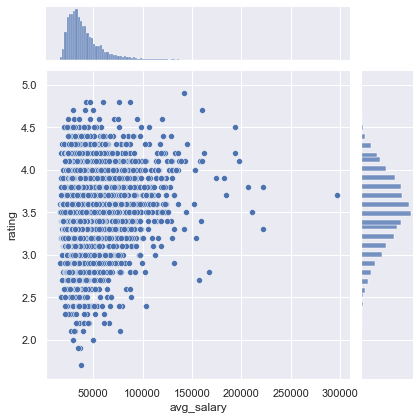

In [19]:
sb.jointplot(data = df, x='avg_salary', y='rating')

In [20]:
pd.concat([df['avg_salary'],df['rating']], axis = 1).reindex().corr()

,avg_salary,rating
avg_salary,1.000000,0.139851
rating,0.139851,1.000000


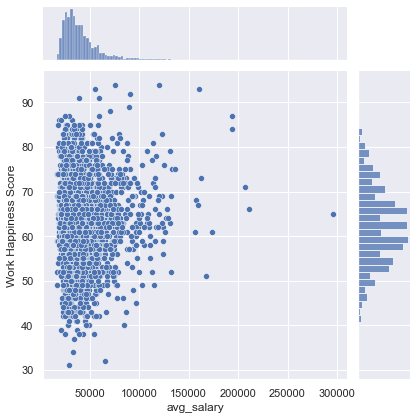

In [21]:
sb.jointplot(data = df2, x='avg_salary', y='Work Happiness Score')

In [22]:
pd.concat([df2['avg_salary'],df2['Work Happiness Score']], axis = 1).reindex().corr()

,avg_salary,Work Happiness Score
avg_salary,1.000000,0.084639
Work Happiness Score,0.084639,1.000000


### Discoveries:

---
---

## 2. Exploring Features (Categorical)
> Employees (Company Size) <br>
> Company Revenue <br>
> Industry <br>

----

### 2.1. Employees (Company Size)
| Label  |Description       | Count       |    
| :---                | :---: | :----: |       
| 1   |  1             |    6    |            
| 2   |  2 to 10       |   66    |   
| 3   |  11 to 50      |   101   |       
| 4   |  51 to 200     |   365   |       
| 5   | 201 to 500     |   755   |       
| 6   | 501 to 1,000   |   954   |       
| 7   |1,001 to 5,000  |   2135  |       
| 8   |5,001 to 10,000 |   734   | 
| 9   |  10,000+       |   1360  | 

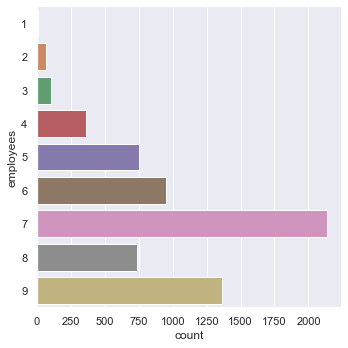

In [23]:
sb.catplot(y='employees', data=df, kind='count')

[Text(0.5, 1.0, 'Happiness v.s. Company size')]

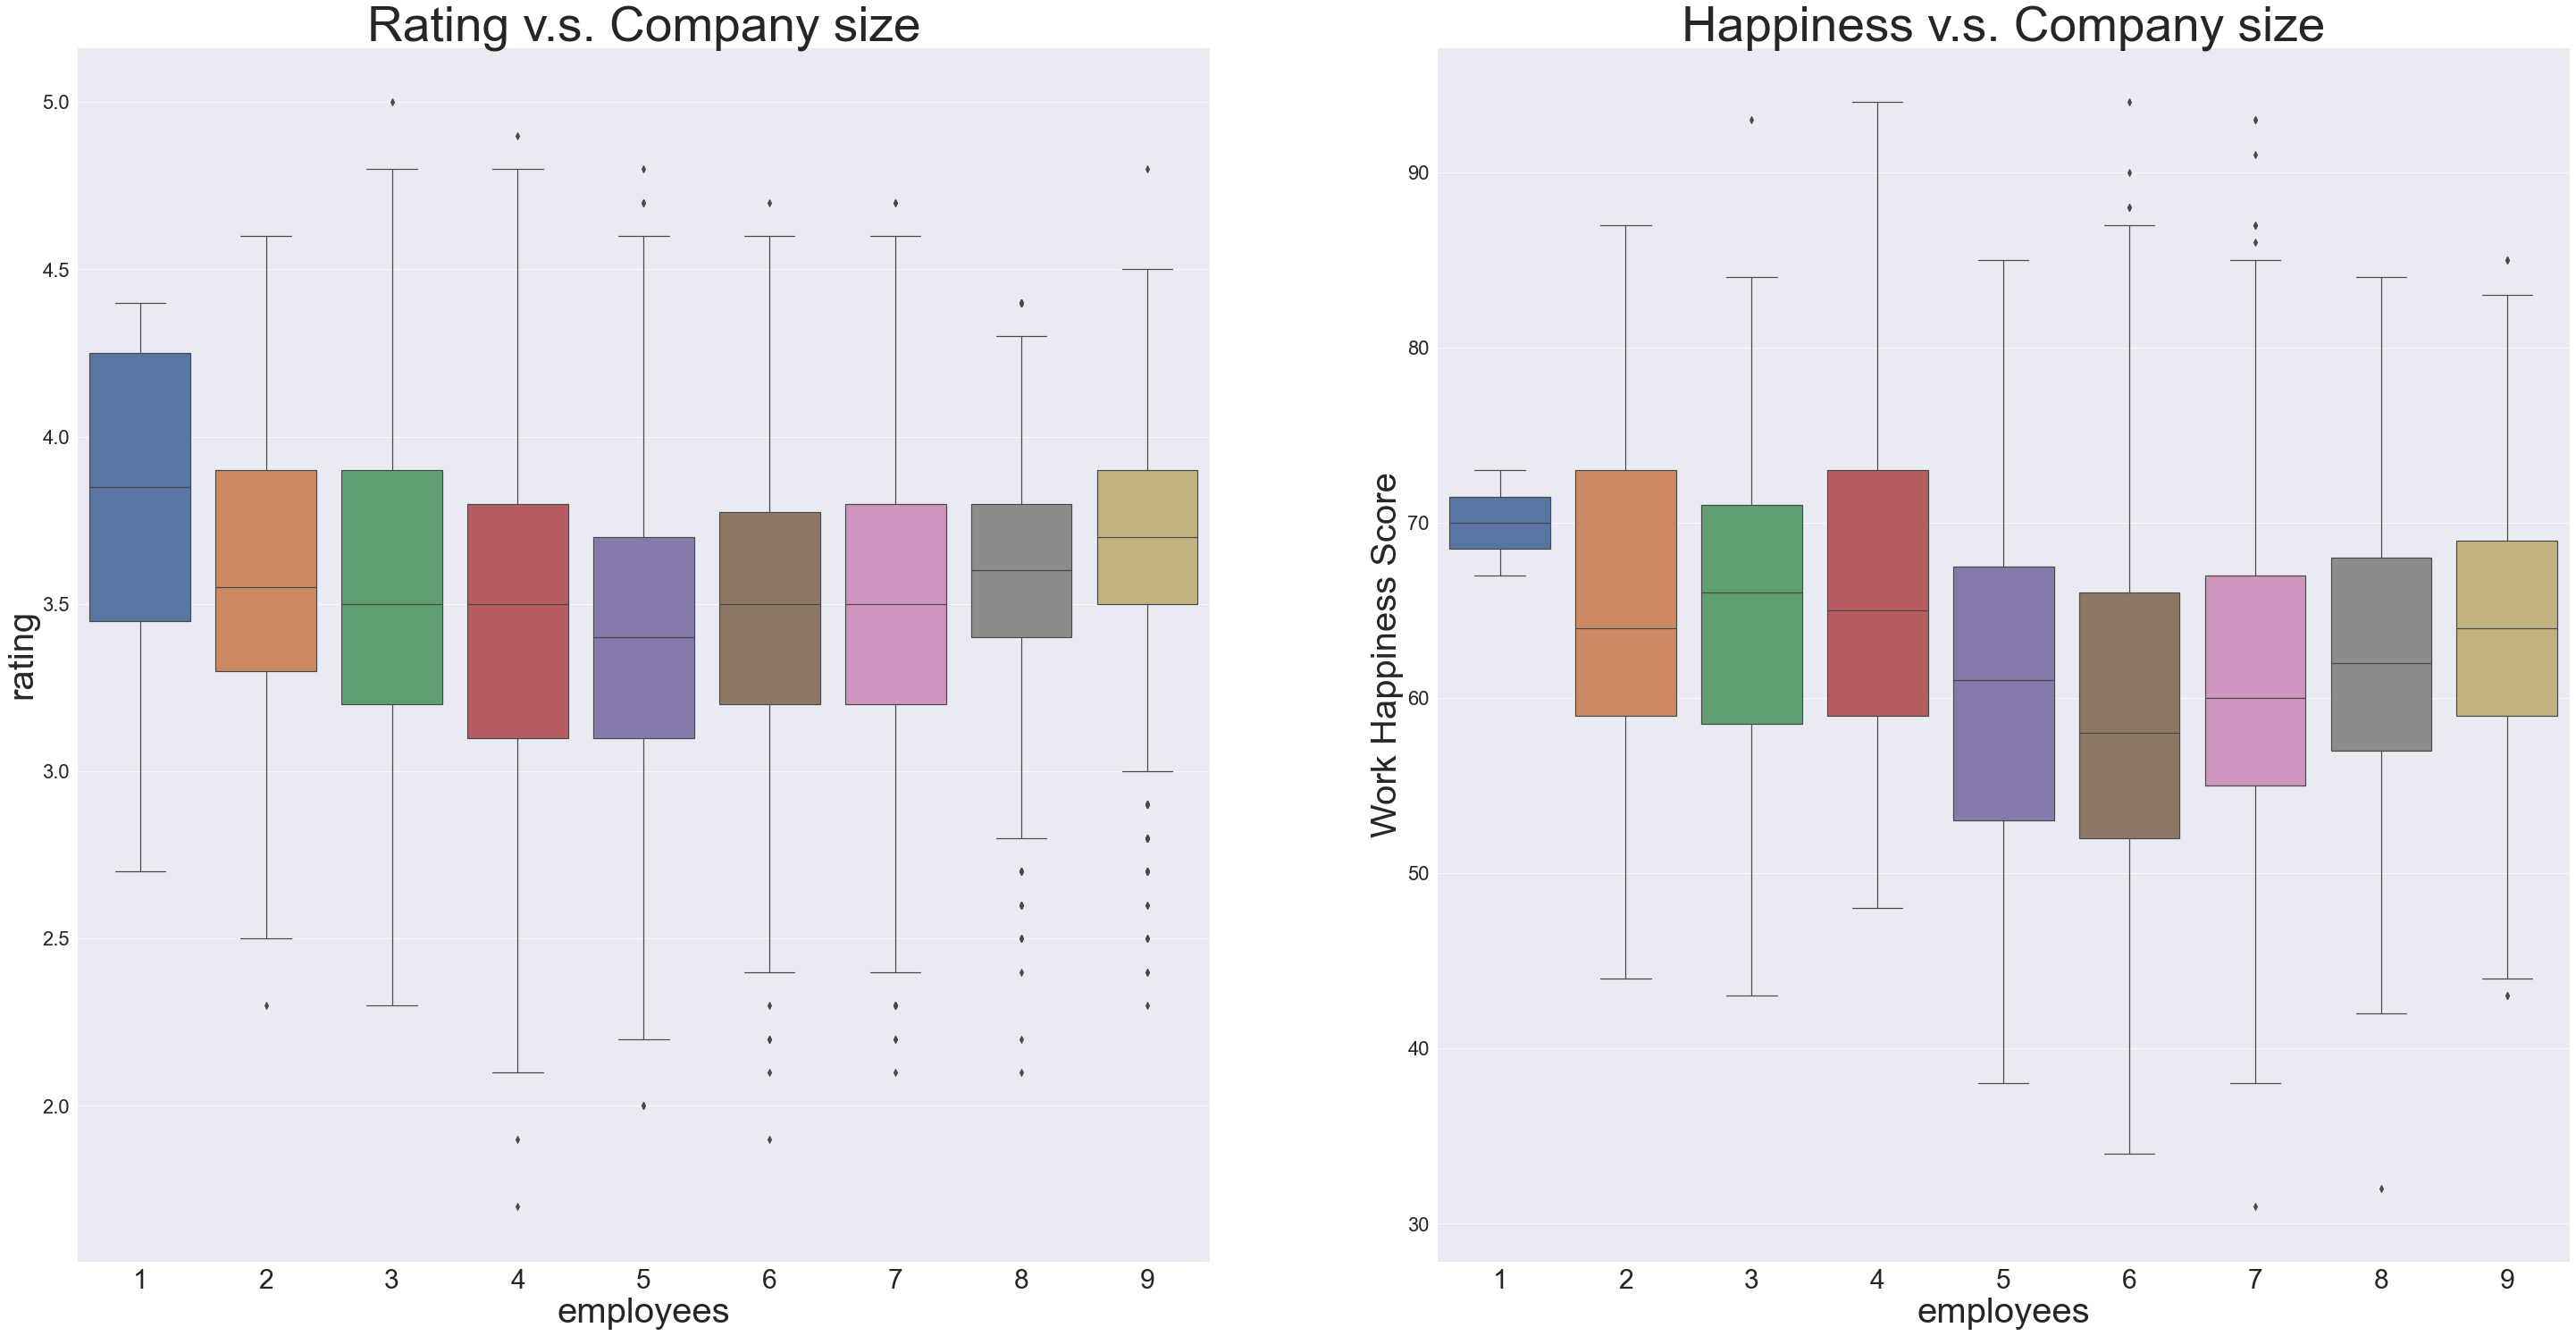

In [32]:
f, axes = plt.subplots(1,2, figsize=(50,25))
sb.set_context("paper", 
               rc={"font.size":30,"axes.titlesize":55,"axes.labelsize":40, "xtick.labelsize":30, "ytick.labelsize": 22})
sb.boxplot(x = 'employees', y = 'rating', data = df, ax=axes[0]).set(title='Rating v.s. Company size')
sb.boxplot(x = 'employees', y = 'Work Happiness Score', data = df2, ax=axes[1]).set(title='Happiness v.s. Company size')

### Discoveries:
It seems like the small (1 employee) size of companies have slight higher ratings and happiness score. 
The large (10,000+) has 2nd high rating, while the smaller size company has higher happiness score
> Let's ignore small size company since the ratings may from the founder himself / herself, lacking objectivity, and the data size is quite small <br>
> For large company having higher ratings, we wonder whether the higer company revenue would lead to better ratings. <br>
> For small company having higher happiness score, we wonder what are the attributes affecting it, e.g. management, culture, etc.

### 2.2. Revenue (Company Financial Condition)
| Label  |Description       | Count       |    
| :---                | :------: | :--------: |    
| 1   |  less than 1M (USD)  |    233 |            
| 2   |  1 to 5M (USD)      |    298 |   
| 3   |  5M to 25M (USD)    |    667 |       
| 4   |  25M to 100M (USD) |    1127|       
| 5   |  100M to 500M (USD) |   1541 |       
| 6   |  500M to 1B (USD)   |   626  |       
| 7   |  1B to 5B (USD)     |   1169 |       
| 8   |  5B to 10B (USD)    |   306  | 
| 9   |  more than 10B (USD) |   509  | 

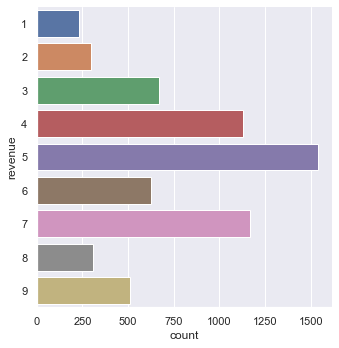

In [40]:
sb.set_context("notebook")
sb.catplot(y='revenue', data=df, kind='count')

[Text(0.5, 1.0, 'Happiness v.s. Company Revenue')]

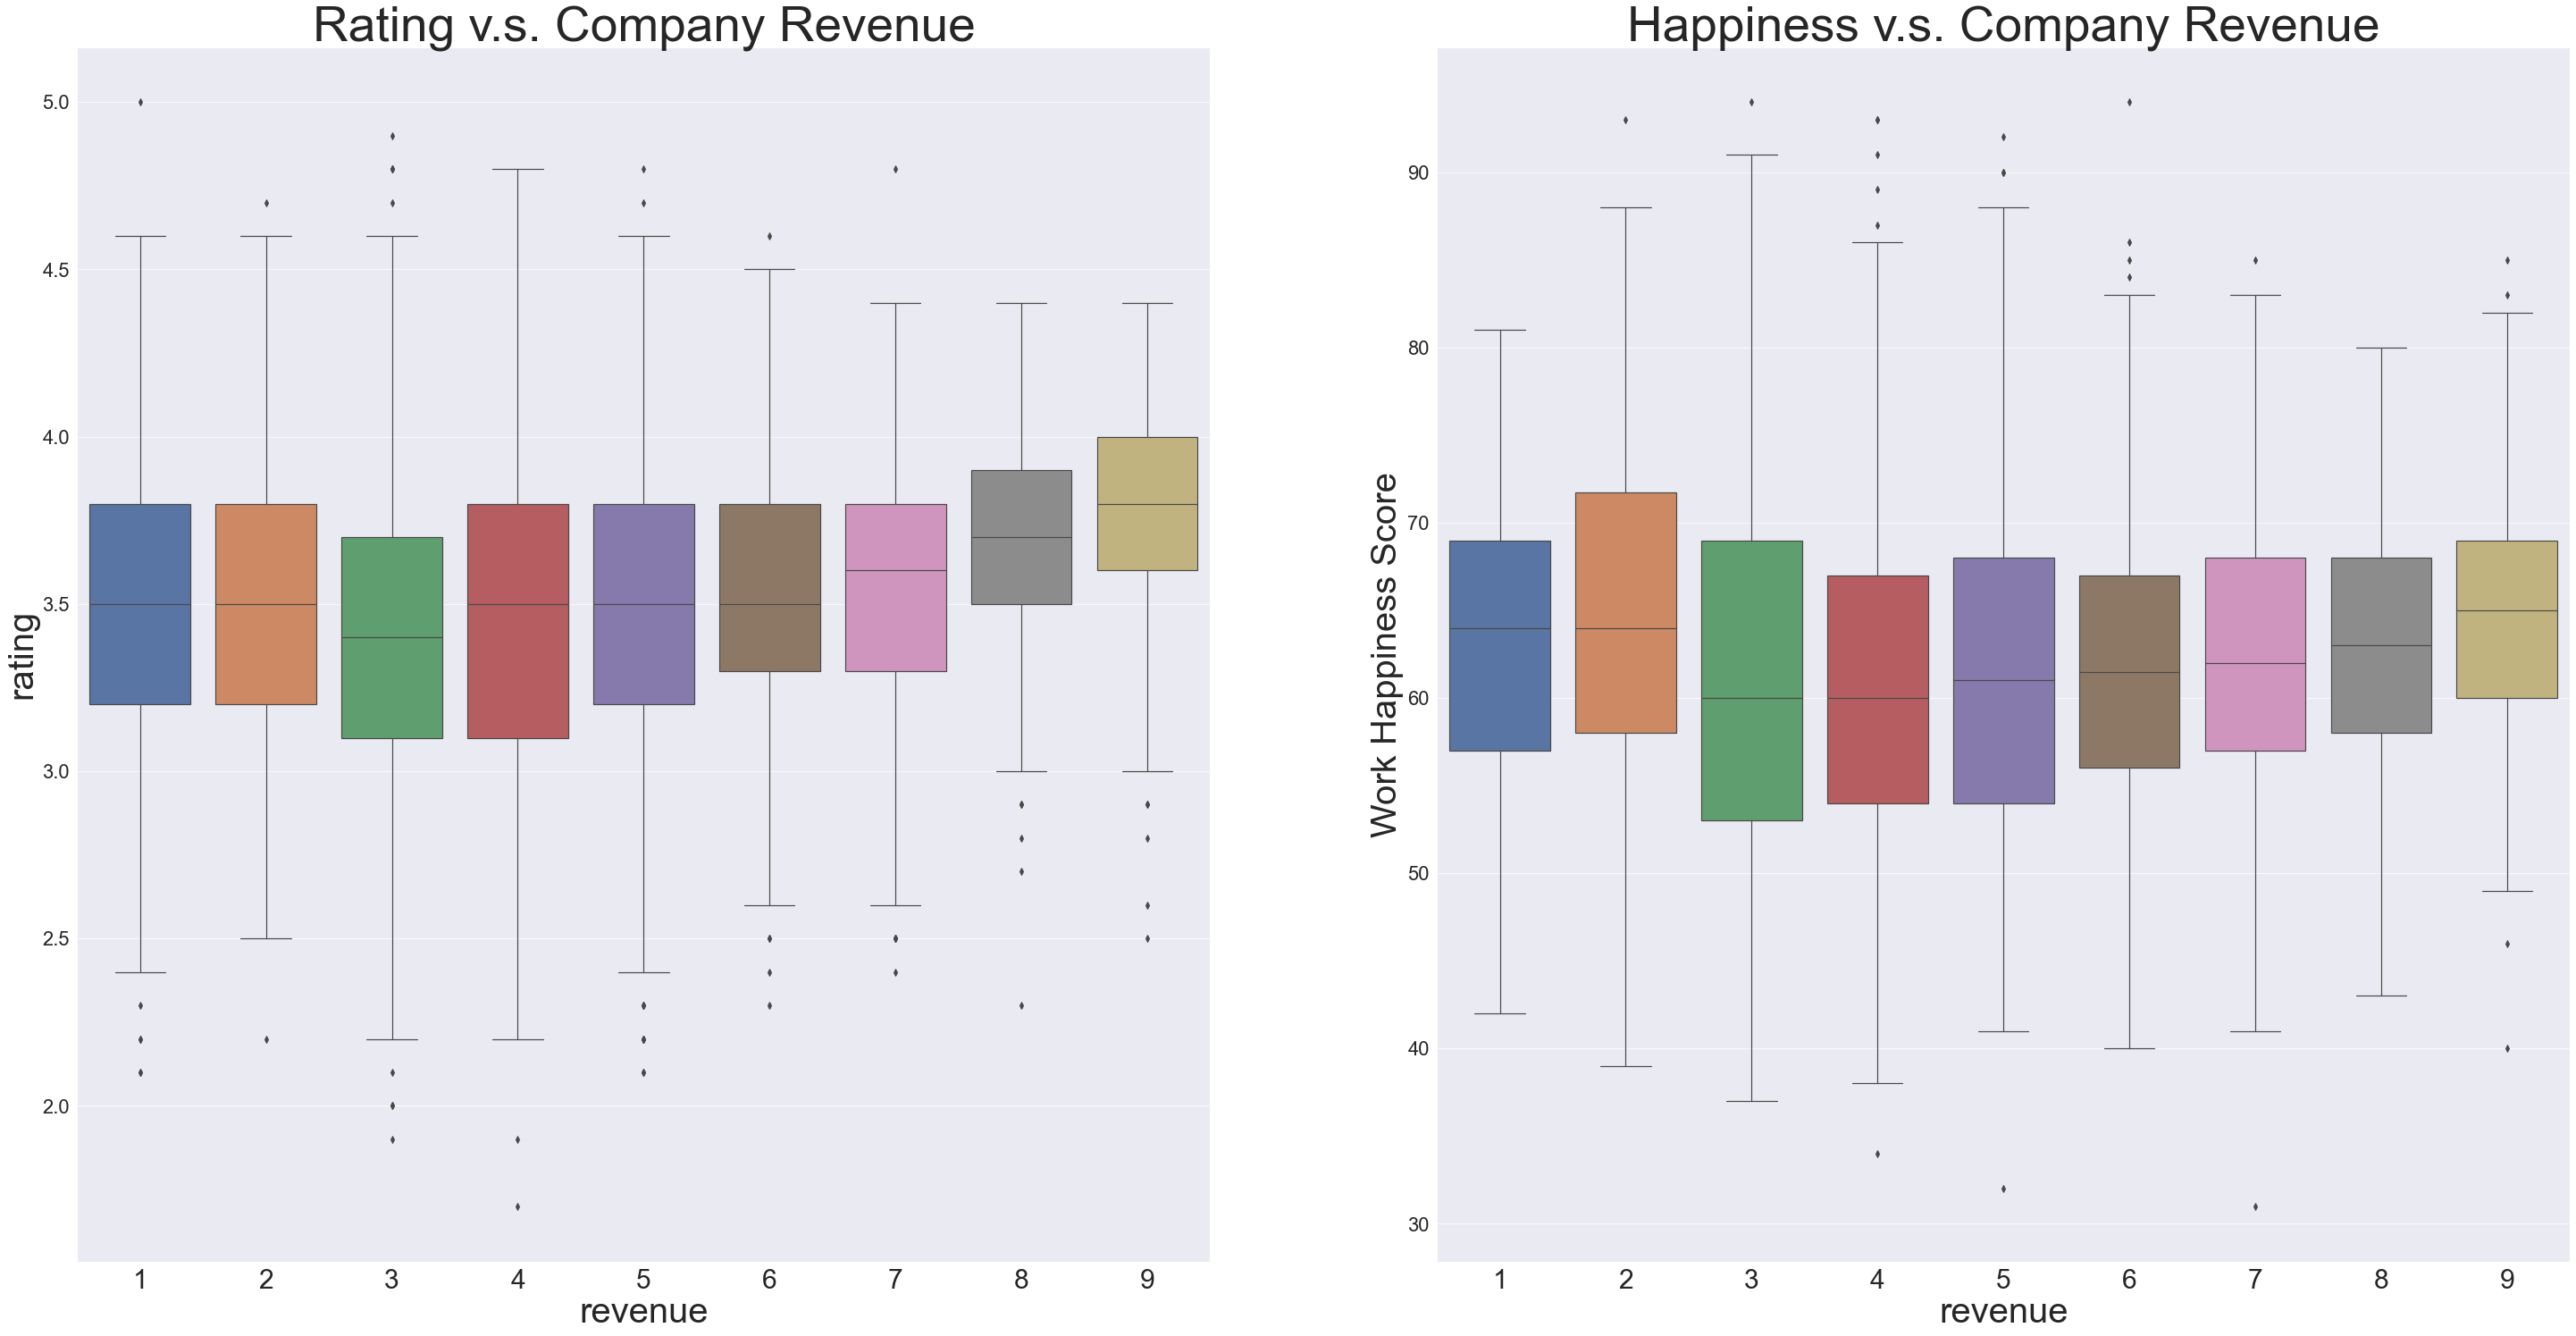

In [44]:

f, axes = plt.subplots(1,2, figsize=(50,25))
sb.set_context("paper", 
               rc={"font.size":30,"axes.titlesize":55,"axes.labelsize":40, "xtick.labelsize":30, "ytick.labelsize": 22})
sb.boxplot(x = 'revenue', y = 'rating', data = df,  ax=axes[0]).set(title='Rating v.s. Company Revenue')
sb.boxplot(x = 'revenue', y = 'Work Happiness Score', data = df2, ax=axes[1]).set(title='Happiness v.s. Company Revenue')


### Discoveries:
1. There is slight increase in median of ratings when revenue increases, however, the lowest and highest rating appear in company earning comparatively less.
2. The same trend applies to happiness score as well.

### 2.3. Industry 
We then explore the difference of ratings among industries, and relate them with other features
- Financials
- Leisure
- Healthcare_NGO
- Telecomm
- Govt_Services
- Tech
- Commodities
- FNB
- Retail
- Real_Estate

<AxesSubplot:xlabel='count', ylabel='industry'>

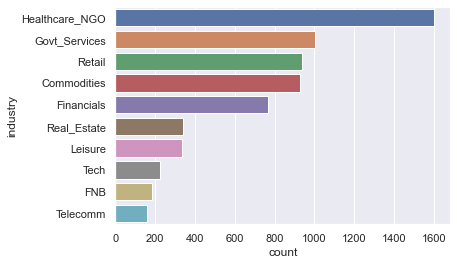

In [46]:
sb.set_context("notebook")
sb.countplot(y='industry', data=df, order=df['industry'].value_counts().index)

[Text(0.5, 1.0, 'Happiness v.s. Industry')]

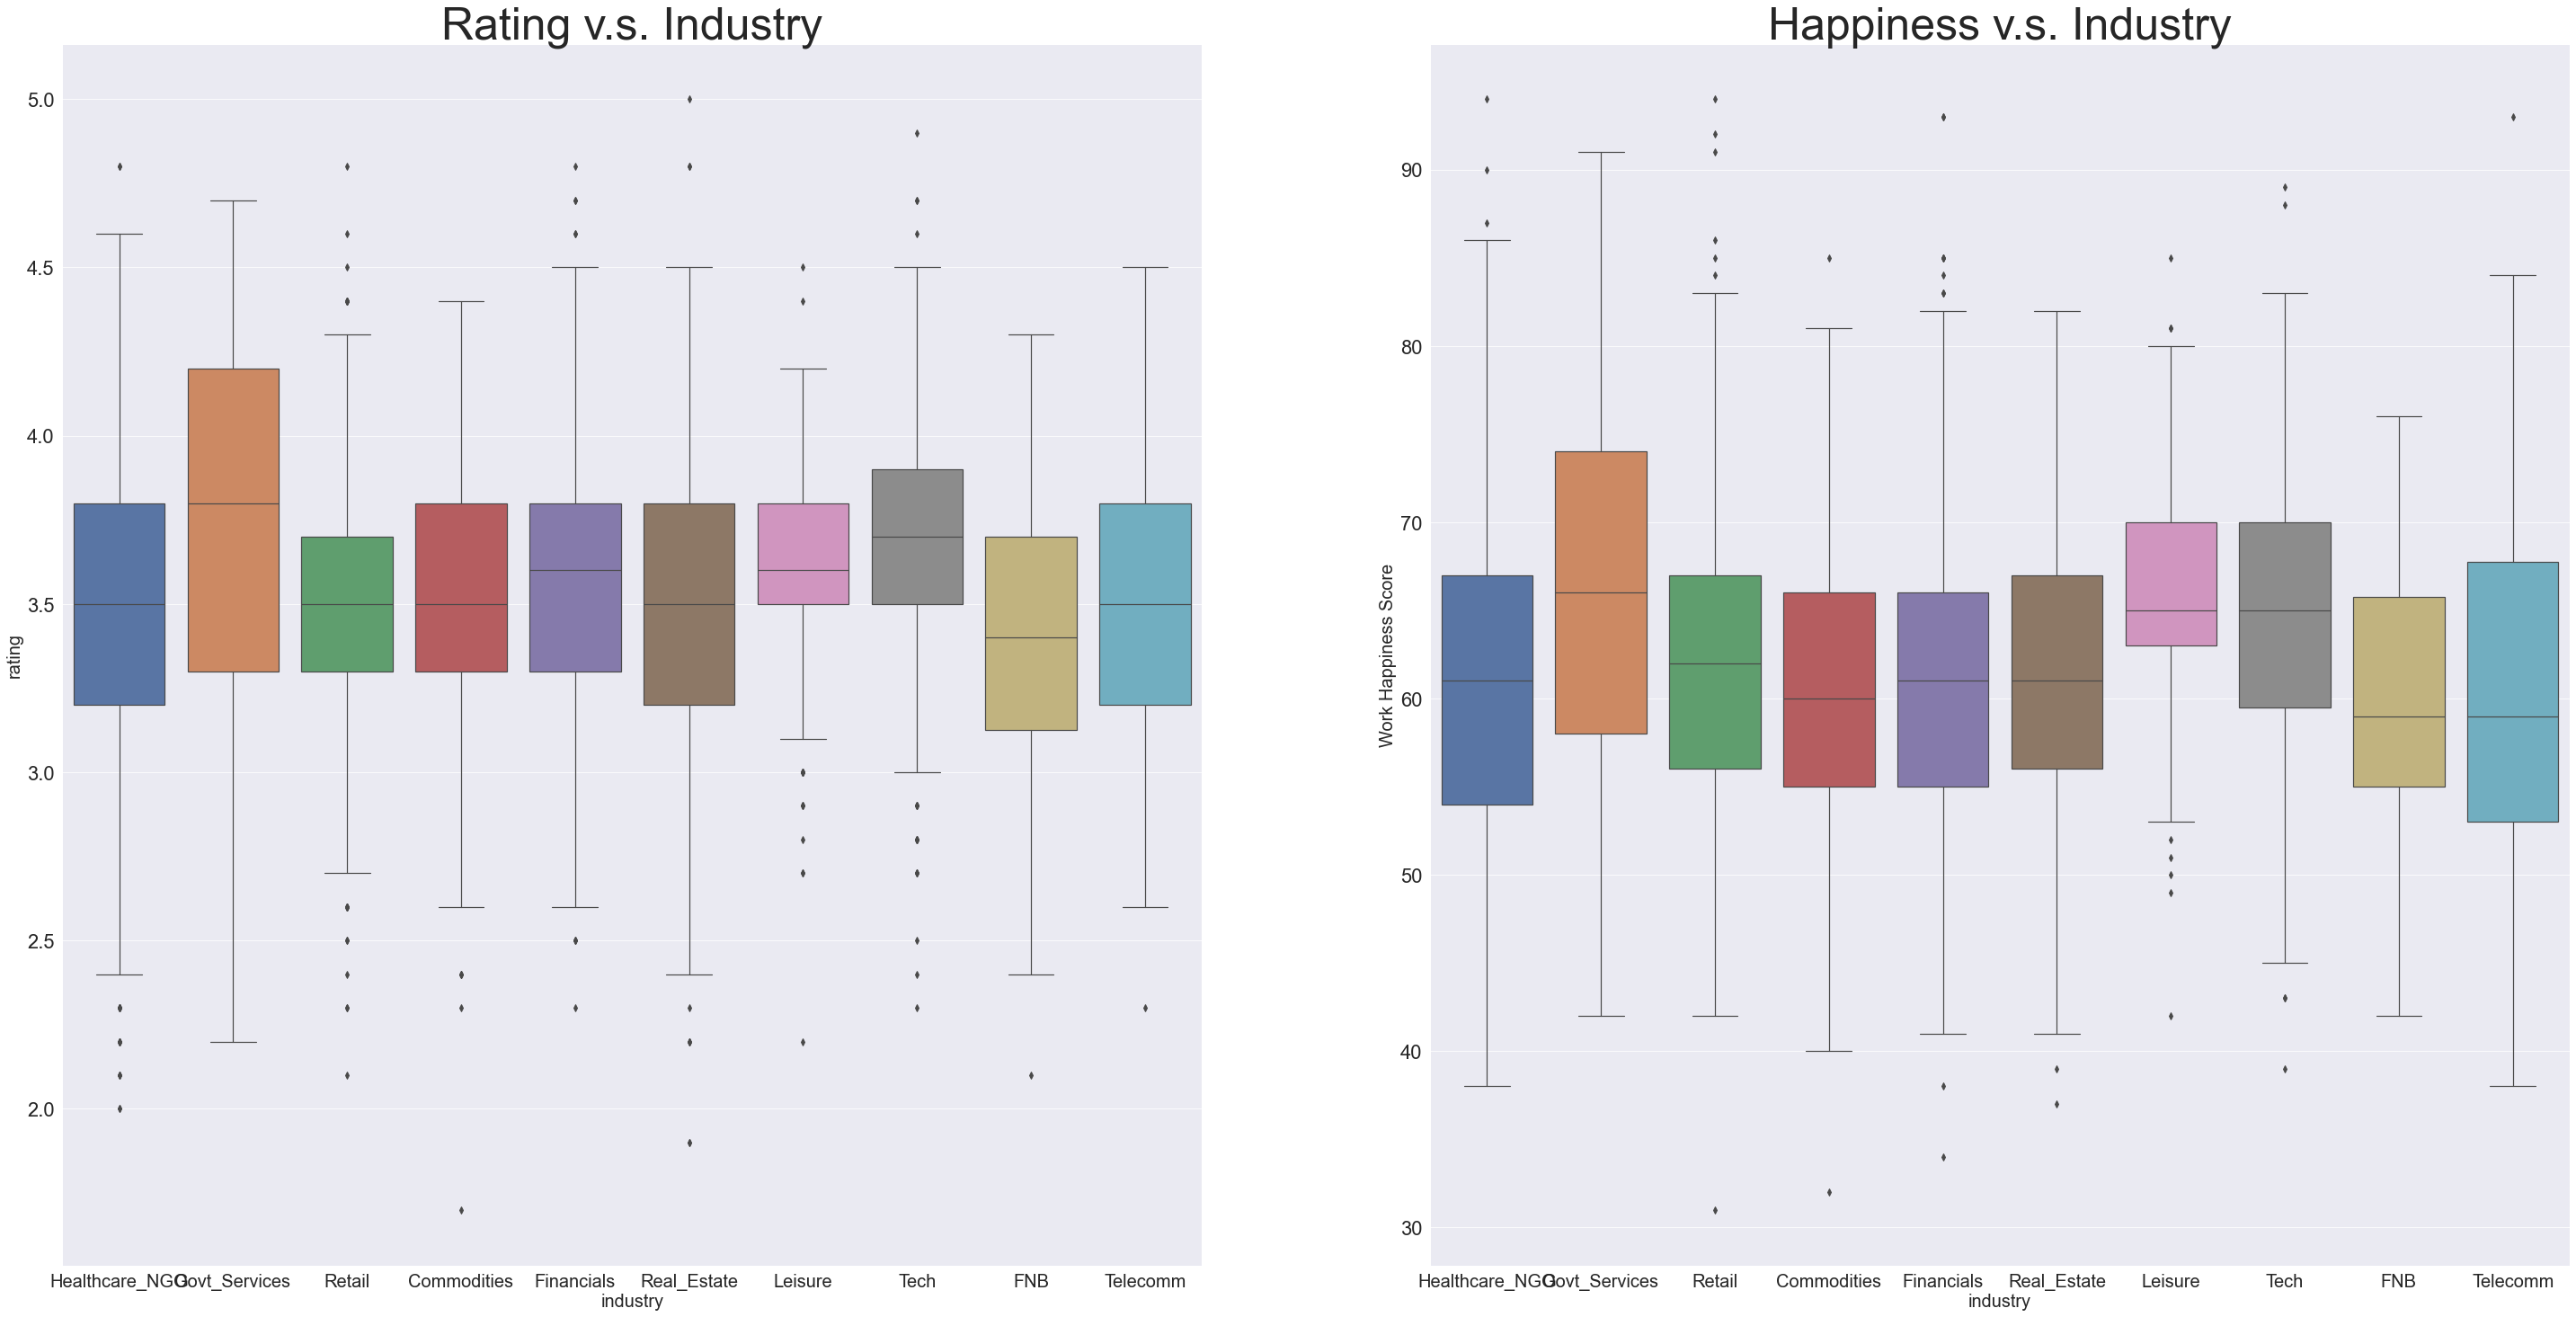

In [64]:
f, axes = plt.subplots(1,2, figsize=(50,25))
sb.set_context("paper", 
               rc={"font.size":30,"axes.titlesize":50,"axes.labelsize":20, "xtick.labelsize":20, "ytick.labelsize": 22})

sb.boxplot(x = 'industry', y = 'rating', data = df, 
           order=df['industry'].value_counts().index, ax=axes[0]).set(title='Rating v.s. Industry')

sb.boxplot(x = 'industry', y = 'Work Happiness Score', data = df2,
           order=df['industry'].value_counts().index, ax=axes[1]).set(title='Happiness v.s. Industry')



### Discoveries:
The distribution of ratings across different industries varies.
- Govt_Services having highest median ratings with no outliers 
- Leisure has smallest IQR between 3.5-3.8
- The majority of industries have outliers in ratings

The distribution of happiness score across different industries also varies.
- Similarly Govt_Services having highest median happines with no outliers 
- Leisure has smallest IQR between 3.5-3.8
- The majority of industries have outliers in ratings

This finding leads us to the explorations among `ratings` and `happiness` across different industries to better understand the reasons behind.

---
---

## 3. Exploring Ratings and Happiness with Other Features By Industry

### 3.1. Correlation between variables and rating by industry

In [ ]:
industries = ['Commodities', 'Financials', 'Govt_Services', 'Healthcare_NGO',
       'Leisure', 'Tech', 'Telecomm', 'Real_Estate', 'Retail', 'FNB']
variables = ['avg_salary', 'ceo_approval', 'Work/Life Balance', 'Compensation/Benefits', 'Job Security/Advancement', 
               'Management', 'Culture']

industryCorrDict = {}
for var in variables:
    industryCorrDict[var] = pd.DataFrame()
    
for industry in industries:
    df_temp = df[df['industry'] == industry]
    
    for var in variables:
        corr = df_temp['rating'].corr(df_temp[var])
        industryCorrDict[var][industry] = [corr]

In [ ]:
fig, axes = plt.subplots(4,2, figsize=(50,65))

sb.set_context("paper", 
               rc={"font.size":22,"axes.titlesize":30,"axes.labelsize":22, "xtick.labelsize":22, "ytick.labelsize": 22})

for i, var in enumerate(variables):
    row_index = int(i / 2)
    col_index = int(i - (row_index * 2) )
    chart = sb.barplot(data=industryCorrDict[var].reindex(industryCorrDict[var].mean().sort_values().index, axis=1), ax=axes[row_index, col_index], 
               orient='v')
    axes[row_index, col_index].set_title("Correlation of rating with " + var)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=25)
    

### Discoveries:


### 3.2. Correlation between variables and happiness by industry

In [ ]:
happiness = ['ceo_approval', 'avg_salary', 'Work/Life Balance', 'Compensation/Benefits', 
             'Job Security/Advancement', 'Management', 'Culture']
for var in happiness:
    industryCorrDict[var] = pd.DataFrame()
    
for industry in industries:
    df_temp = df2[df2['industry'] == industry]
    
    for var in happiness:
        corr = df_temp['Work Happiness Score'].corr(df_temp[var])
        industryCorrDict[var][industry] = [corr]

In [ ]:
fig, axes = plt.subplots(4,2, figsize=(50,65))

sb.set_context("paper", 
               rc={"font.size":22,"axes.titlesize":30,"axes.labelsize":22, "xtick.labelsize":22, "ytick.labelsize": 22})

for i, var in enumerate(variables):
    row_index = int(i / 2)
    col_index = int(i - (row_index * 2) )
    chart = sb.barplot(data=industryCorrDict[var].reindex(industryCorrDict[var].mean().sort_values().index, axis=1), ax=axes[row_index, col_index], 
               orient='v')
    axes[row_index, col_index].set_title("Correlation of happiness with " + var)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=25)

    
    

### Discoveries:
